In [18]:
import sympy as sp
sp.init_printing()
from pynoa import *

Set `autosave` to **True** if you want to save the object files automatically.

Set the directory where you want to save the file in `NOA_obj_save_dir`

In [19]:
autosave = False
NOA_obj_save_dir = "backup/example_martinelli_mobile_robot"

# Non-Circular Trajectory Simultaneous Odometry and Bearing Sensor Calibration
Original process model $\dot{\mathbf{x}}=\mathbf{f}(\mathbf{x},\mathbf{u})$:

\begin{equation}
    \begin{aligned}
        \dot{\mu} &= -\mu^2 \frac{v}{\rho} \cos(\gamma - \phi) \\
        \dot{\gamma} &= \omega - \mu \frac{v}{\rho} \sin(\gamma - \phi) \\
        \dot{\phi} &= \dot{\rho} = \dot{\psi} = \dot{r_R} = \dot{r_L} = \dot{B} = 0
    \end{aligned}
\end{equation}
and measurement model $\mathbf{y}=\mathbf{h}(\mathbf{x},\mathbf{u})$:
\begin{equation}
    \beta = -\arctan\left(\frac{\sin(\gamma)}{\mu+\cos(\gamma)}\right)-\psi
\end{equation}
where:
* the state vector $\mathbf{x} = \begin{bmatrix} 
                                    \mu & \gamma & \phi & \rho & \psi & r_R & r_L & B
                                    \end{bmatrix}^\top$
* the control inputs $\mathbf{u} =  \begin{bmatrix} 
                                    v & \omega
                                    \end{bmatrix}^\top$


Modified process model $\dot{\mathbf{x}}=\mathbf{f}(\mathbf{x},\mathbf{u})$:

\begin{equation}
    \begin{aligned}
        \dot{\mu} &= -\mu^2 \eta (\omega_R + \delta\omega_L) \cos(\gamma - \phi) \\
        \dot{\gamma} &= \xi (\omega_R-\delta\omega_L) - \mu\eta(\omega_R+\delta\omega_L)\sin(\gamma - \phi) \\
        \dot{\phi} &= \dot{\psi} = \dot{\eta} = \dot{\delta} = \dot{\xi} = 0
    \end{aligned}
\end{equation}
and measurement model $\mathbf{y}=\mathbf{h}(\mathbf{x},\mathbf{u})$:
\begin{equation}
    \beta = -\arctan\left(\frac{\sin(\gamma)}{\mu+\cos(\gamma)}\right)-\psi
\end{equation}
where:
* the state vector $\mathbf{x} = \begin{bmatrix} 
                                    \mu & \gamma & \phi & \psi & \eta & \delta & \xi
                                    \end{bmatrix}^\top$
* the control inputs $\mathbf{u} =  \begin{bmatrix} 
                                    \omega_R & \omega_L
                                    \end{bmatrix}^\top$


In [20]:
# State vector
mu, gamma = sp.symbols("\mu, \gamma")
phi, psi, eta, delta, xi = sp.symbols("\phi, \psi, \eta, \delta, xi")
noncircular = NOA("noncircular_trajectory_mobile_robot")
noncircular.x = sp.Matrix([mu, gamma, phi, psi, eta, delta, xi])

# Control inputs
omega_R, omega_L = sp.symbols("\omega_R, omega_L")

noncircular_trajectory_mobile_robot NOA object initialized


Convert the process model into the control-affine form:

\begin{equation}
\mathbf{\dot x}=
\mathbf{f}_0(\mathbf{x})
+
\sum_{i=1}^m\mathbf{f}_i(\mathbf{x})u_i.
\end{equation}

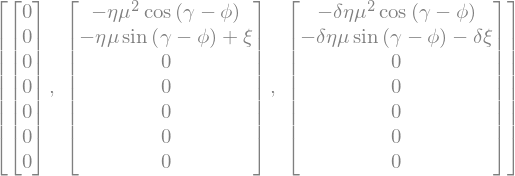

In [21]:
# Control-affine vector fields of process model \dot{x} = f(x,u)
f0 = sp.zeros(7,1)
f1 = sp.Matrix([[-mu**2*eta*sp.cos(gamma-phi), xi-mu*eta*sp.sin(gamma-phi), 0, 0 ,0 ,0, 0]]).T
f2 = sp.Matrix([[-mu**2*eta*delta*sp.cos(gamma-phi), -xi*delta-mu*eta*delta*sp.sin(gamma-phi), 0, 0, 0, 0, 0]]).T
noncircular.f = [f0, f1, f2]
noncircular.f

In [22]:
# Measurement model y=h(x,u)
noncircular.h = sp.Matrix([-sp.atan2(sp.sin(gamma),(mu+sp.cos(gamma))) - psi])
# noncircular.h = sp.Matrix([-sp.atan(sp.sin(gamma)/(mu+sp.cos(gamma))) - psi])
noncircular.h

In [23]:
# # FAIL it takes forever to compute symbolic rank
# # Observability rank criterion using NOA object
# noncircular.rank_calc_opt = "symbolic"
# noncircular.ORC()

In [24]:
# # FAIL it takes forever to compute symbolic nullspace
# noncircular.null_calc_opt = "symbolic"
# noncircular.observable_mode()

In [25]:
if(autosave):
    noncircular.save(NOA_obj_save_dir)

In [26]:
noncircular.LD_order = 2
noncircular.combn_permn_opt = "permutation"
noncircular.rank_calc_opt = "numeric"
noncircular.params_config_subs = sp.Matrix([noncircular.x])
noncircular.ORC()

Permutation of Vector Fields
[(0,), (1,), (2,)]
current Lie derivative:  k1f0  not appended to observability matrix due to null vector
current Lie derivative:  k1f1 appended to observability matrix
current Lie derivative:  k1f2 appended to observability matrix
[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
current Lie derivative:  k2f0f0  not appended to observability matrix due to null vector
current Lie derivative:  k2f0f1  not appended to observability matrix due to null vector
current Lie derivative:  k2f0f2  not appended to observability matrix due to null vector
current Lie derivative:  k2f1f0  not appended to observability matrix due to null vector
current Lie derivative:  k2f1f1 appended to observability matrix
current Lie derivative:  k2f1f2 appended to observability matrix
current Lie derivative:  k2f2f0  not appended to observability matrix due to null vector
current Lie derivative:  k2f2f1 appended to observability matrix
current Lie derivative:  k

# Circular Trajectory Simultaneous Odometry and Bearing Sensor Calibration
From Equation (19) of Martinelli's paper  
Modified process model $\dot{\mathbf{x}}=\mathbf{f}(\mathbf{x},\mathbf{u})$:

\begin{equation}
    \begin{aligned}
        \dot{\mu} &= -\mu^2 \eta_q \nu \cos(\gamma - \phi) \\
        \dot{\gamma} &= \eta_q\nu - \mu\eta_q\nu\sin(\gamma - \phi) \\
        \dot{\eta_q} &= \dot{\xi_q} = \dot{\phi} = 0
    \end{aligned}
\end{equation}
and measurement model $\mathbf{y}=\mathbf{h}(\mathbf{x},\mathbf{u})$:
\begin{equation}
    y = \frac{\sin(\gamma)}{\mu+\cos(\gamma)}
\end{equation}
where:
* the state vector $\mathbf{x} = \begin{bmatrix} 
                                    \mu & \gamma & \eta_q & \xi_q & \phi
                                    \end{bmatrix}^\top$
* the control inputs $\mathbf{u} = \nu$

In [28]:
# State vector
eta_q, xi_q = sp.symbols("\eta_q, xi_q")
circular = NOA("circular_trajectory_mobile_robot")
circular.x = sp.Matrix([mu, gamma, eta_q, xi_q, phi])

# Control inputs
nu = sp.symbols("\nu")

circular_trajectory_mobile_robot NOA object initialized


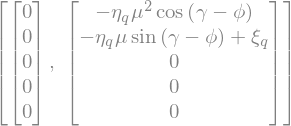

In [29]:
# Control-affine vector fields of process model \dot{x} = f(x,u)
f0_circ = sp.zeros(5,1)
f1_circ = sp.Matrix([[-mu**2*eta_q*sp.cos(gamma-phi), xi_q-mu*eta_q*sp.sin(gamma-phi), 0, 0 ,0]]).T
circular.f = [f0_circ, f1_circ]
circular.f

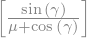

In [30]:
# Measurement model y=h(x,u)
circular.h = sp.Matrix([sp.sin(gamma)/(mu+sp.cos(gamma))])
circular.h

In [31]:
# # FAIL it takes forever to compute symbolic rank
# circular.rank_calc_opt = "symbolic"
# circular.ORC()

In [32]:
# # FAIL it takes forever to compute symbolic rank
# circular.null_calc_opt = "symbolic"
# circular.observable_mode()

In [33]:
# Numerical Observability Rank Criterion of Circular Trajectory
circular.LD_order = 2 #4
# circular.combn_permn_opt = "permutation"
circular.combn_permn_opt = "combination"
circular.rank_calc_opt = "numeric"
circular.params_config_subs = sp.Matrix([circular.x])
circular.ORC()

Combination of Vector Fields
[(0,), (1,)]
current Lie derivative:  k1f0  not appended to observability matrix due to null vector
current Lie derivative:  k1f1 appended to observability matrix
[(0, 1)]
current Lie derivative:  k2f0f1  not appended to observability matrix due to null vector
Insufficient obsv_mat rows. Auto-construct obsv_mat using Permutation of vector fields ...
Permutation of Vector Fields
[(0,), (1,)]
current Lie derivative:  k1f0  not appended to observability matrix due to null vector
current Lie derivative:  k1f1 appended to observability matrix
[(0, 0), (0, 1), (1, 0), (1, 1)]
current Lie derivative:  k2f0f0  not appended to observability matrix due to null vector
current Lie derivative:  k2f0f1  not appended to observability matrix due to null vector
current Lie derivative:  k2f1f0  not appended to observability matrix due to null vector
current Lie derivative:  k2f1f1 appended to observability matrix
[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0,

Why is it full rank, i.e. WLO? It should only be 4 out of 5 observable according to Martinelli's paper.  
A probable cause is the use of floating numbers when normalizing the prime numbers.  
For example: $\frac{2}{1} = 2.0$, $\frac{3}{1} = 3.0$, $\frac{11}{10} = 1.1$, $\frac{13}{10}=1.3$  
Try again with manual prime number substitution without normalization ...

In [34]:
# Manual substitution of parameters with prime numbers
circular.params_config_subs = sp.Matrix([circular.x])
new_params_dict = {mu: 2, gamma: 3, eta_q: 5, xi_q: 7, phi: 11}
circular.update_params_dict(new_params_dict)
circular.ORC()

Permutation of Vector Fields
[(0,), (1,)]
current Lie derivative:  k1f0  not appended to observability matrix due to null vector
current Lie derivative:  k1f1 appended to observability matrix
[(0, 0), (0, 1), (1, 0), (1, 1)]
current Lie derivative:  k2f0f0  not appended to observability matrix due to null vector
current Lie derivative:  k2f0f1  not appended to observability matrix due to null vector
current Lie derivative:  k2f1f0  not appended to observability matrix due to null vector
current Lie derivative:  k2f1f1 appended to observability matrix
[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
current Lie derivative:  k3f0f0f0  not appended to observability matrix due to null vector
current Lie derivative:  k3f0f0f1  not appended to observability matrix due to null vector
current Lie derivative:  k3f0f1f0  not appended to observability matrix due to null vector
current Lie derivative:  k3f0f1f1  not appended to observability matrix due to nu

Result: 4 out of 5 observable. It confirms with the results from Martinelli's paper.  
So, the conclusion is **DO NOT SUBSTITUTE SYMBOLIC WITH FLOATING NUMBERS!**,  
especially if there are trigonometric functions.  
Substitute only with integers, *distinct prime numbers* to be exact.

In [35]:
# circular.null_calc_opt = "numeric"
# circular.observable_mode()
# circular.cont_symm

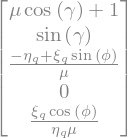

In [36]:
groundtruth_contsymm = sp.Matrix([[mu*sp.cos(gamma)+1, 
                                   sp.sin(gamma),
                                   (xi_q*sp.sin(phi)-eta_q)/mu,
                                   0,
                                   xi_q*sp.cos(phi)/(eta_q*mu)]]).T
groundtruth_contsymm

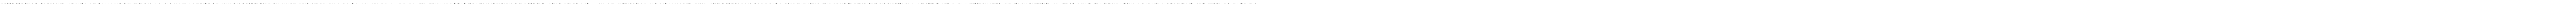

In [37]:
# Check if groundtruth_contsymm is the nullspace of circular.obsv_mat
# by checking if it is a null vector
is_it_null_vector = sp.simplify(circular.obsv_mat*groundtruth_contsymm)
is_it_null_vector

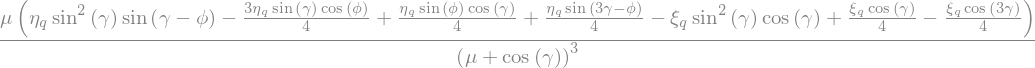

In [49]:
is_it_null_vector[1]

This element of `is_it_null_vector` is supposed to be zero. In fact, further validation using symbolic MATLAB results in all of the elements of `is_it_null_vector` equal to zero.  
There is a problem with `sympy`'s symbolic simplification.  
**TODO:** Fix sympy's simplify command, especially for trigonometric simplification